# Regression Challenge

Predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location.

In this challenge, you will use a dataset of real estate sales transactions to predict the price-per-unit of a property based on its features. The price-per-unit in this data is based on a unit measurement of 3.3 square meters.

> **Citation**: The data used in this exercise originates from the following study:
>
> *Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.*
>
> It was obtained from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository]([http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science).

## Review the data

Run the following cell to load the data and view the first few rows.

In [3]:
import pandas as pd

# load the training dataset
data = pd.read_csv('real_estate.csv',parse_dates=True)

In [4]:
data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


The data consists of the following variables:

- **transaction_date** - the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- **house_age** - the house age (in years)
- **transit_distance** - the distance to the nearest light rail station (in meters)
- **local_convenience_stores** - the number of convenience stores within walking distance
- **latitude** - the geographic coordinate, latitude
- **longitude** - the geographic coordinate, longitude
- **price_per_unit** house price of unit area (3.3 square meters)

## Train a Regression Model

Your challenge is to explore and prepare the data, identify predictive features that will help predict the **price_per_unit** label, and train a regression model that achieves the lowest Root Mean Square Error (RMSE) you can achieve (which must be less than **7**) when evaluated against a test subset of data.

Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [02 - Real Estate Regression Solution.ipynb](02%20-%20Real%20Estate%20Regression%20Solution.ipynb).

In [ ]:
# Your code to explore data and train a regression model

## Use the Trained Model

Save your trained model, and then use it to predict the price-per-unit for the following real estate transactions:

| transaction_date | house_age | transit_distance | local_convenience_stores | latitude | longitude |
| ---------------- | --------- | ---------------- | ------------------------ | -------- | --------- |
|2013.167|16.2|289.3248|5|24.98203|121.54348|
|2013.000|13.6|4082.015|0|24.94155|121.50381|

In [2]:
# Your code to use the trained model

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   transaction_date          414 non-null    float64
 1   house_age                 414 non-null    float64
 2   transit_distance          414 non-null    float64
 3   local_convenience_stores  414 non-null    int64  
 4   latitude                  414 non-null    float64
 5   longitude                 414 non-null    float64
 6   price_per_unit            414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


Note, price per unit is the dependent variable

In [64]:
data.isnull().sum().sum()

0

No null value

In [6]:
from datetime import datetime
import numpy as np

In [8]:
data['transaction_date2']=pd.to_datetime(data['transaction_date'])

In [11]:
#del data['transaction_date2']

In [14]:
data['price_per_unit']

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: price_per_unit, Length: 414, dtype: float64

In [12]:
data[data.columns[-1]]

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: price_per_unit, Length: 414, dtype: float64

In [15]:
# import library & dataset
import seaborn as sns

C:\Users\aduzo\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


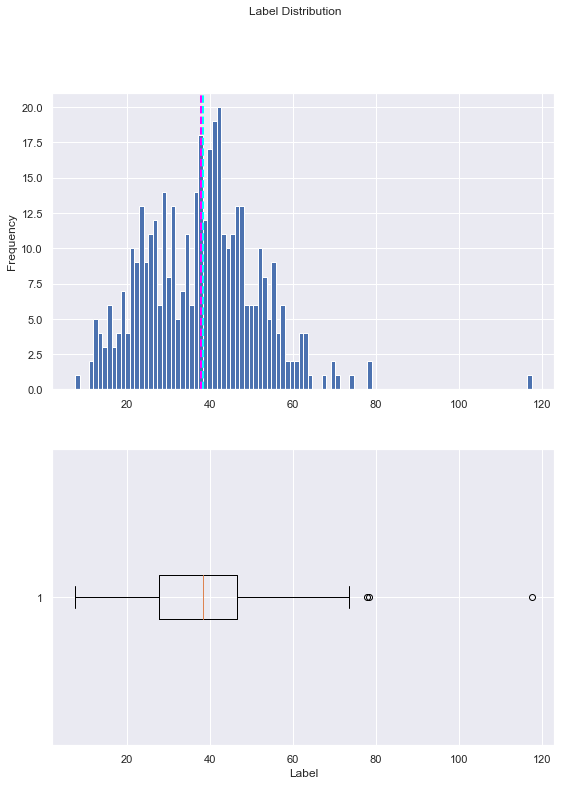

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Get the label column
label= data[data.columns[-1]]

# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize = (9,12))

# Plot the histogram
ax[0].hist(label,bins=100)
ax[0].set_ylabel('Frequency')

# Add lines for the mean, median and mode
ax[0].axvline(label.mean(), color= 'magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# Plot the boxplot   
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Label')

# Add a title to the Figure
fig.suptitle('Label Distribution')

# Show the figure
fig.show()

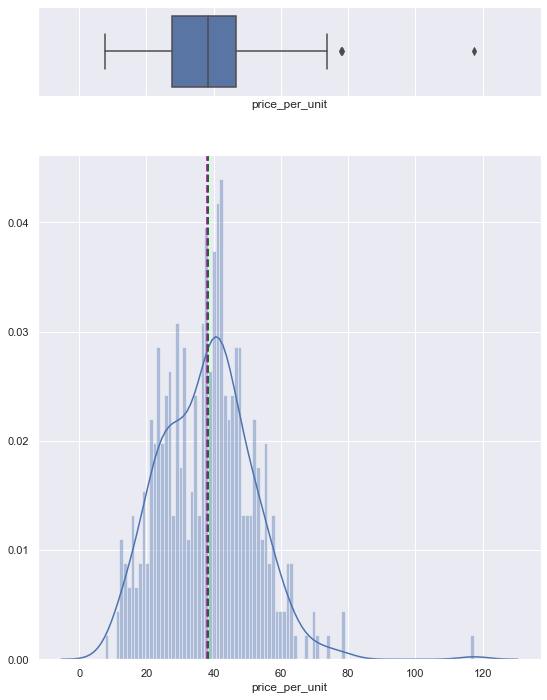

In [32]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")

# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)},figsize = (9,12))

# assigning a graph to each ax
sns.boxplot(data["price_per_unit"],ax=ax_box)
sns.distplot(data["price_per_unit"],ax=ax_hist,bins=100)

ax_hist.axvline(data["price_per_unit"].mean(), color= 'magenta', linestyle='dashed', linewidth=2)
ax_hist.axvline(data["price_per_unit"].median(), color='green', linestyle='dashed', linewidth=2)

# Remove x axis name for the boxplot
#ax_box.set(xlabel='')
plt.show()
 

In [29]:
data["price_per_unit"].mean()

37.98019323671498

Remove outliers

In [34]:
# By visualising the plot above
data[data['price_per_unit']>70]

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
16,2013.250,0.0,292.9978,6,24.97744,121.54458,70.1
105,2012.833,0.0,292.9978,6,24.97744,121.54458,71.0
166,2013.417,0.0,292.9978,6,24.97744,121.54458,73.6
220,2013.333,37.2,186.5101,9,24.97703,121.54265,78.3
270,2013.333,10.8,252.5822,1,24.97460,121.53046,117.5
312,2013.583,35.4,318.5292,9,24.97071,121.54069,78.0


In [51]:
# Using IQR
def outlier_function(x):
    first= np.percentile(x, 25)
    third= np.percentile(x,75)
    iqr= third- first
    upper_threshold= third+ iqr*1.5
    lower_threshold= first- iqr*1.5
    outliers= {'upper_outliers': x[x> upper_threshold],
               'lower_outliers':x[x< lower_threshold]}
    return outliers

In [37]:
outlier_function(data[data.columns[-1]])

{'upper_outliers': 220     78.3
 270    117.5
 312     78.0
 Name: price_per_unit, dtype: float64,
 'lower_outliers': Series([], Name: price_per_unit, dtype: float64)}

In [42]:
def outlier_function_pd(x):
    first= np.percentile(x, 25)
    third= np.percentile(x,75)
    iqr= third- first
    upper_threshold= third+ iqr*1.5
    lower_threshold= first- iqr*1.5
    outliers= {'upper_outliers': x[x> upper_threshold],
               'lower_outliers':x[x< lower_threshold]}
    return outliers

In [43]:
outlier_function_pd(data['price_per_unit'])

{'upper_outliers': 220     78.3
 270    117.5
 312     78.0
 Name: price_per_unit, dtype: float64,
 'lower_outliers': Series([], Name: price_per_unit, dtype: float64)}

In [46]:
pd.concat([data[data['price_per_unit']>78],data[data['price_per_unit']<2]])

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
220,2013.333,37.2,186.5101,9,24.97703,121.54265,78.3
270,2013.333,10.8,252.5822,1,24.97460,121.53046,117.5


In [48]:
def outlier_function_pd(x):
    first= np.percentile(x, 25)
    third= np.percentile(x,75)
    iqr= third- first
    upper_threshold= third+ iqr*1.5
    lower_threshold= first- iqr*1.5
    outliers=pd.concat([x[x>upper_threshold],x[x<lower_threshold]])
    #outliers= {'upper_outliers': x[x> upper_threshold],
             #  'lower_outliers':x[x< lower_threshold]}
    return outliers

In [50]:
data[data['price_per_unit'].isin(outlier_function_pd(data['price_per_unit']))]

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
220,2013.333,37.2,186.5101,9,24.97703,121.54265,78.3
270,2013.333,10.8,252.5822,1,24.97460,121.53046,117.5
312,2013.583,35.4,318.5292,9,24.97071,121.54069,78.0


from price_per_unit=78.0 is outlier

In [52]:
data[data['price_per_unit'].isin(outlier_function_pd(data['price_per_unit']))==False]

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


C:\Users\aduzo\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


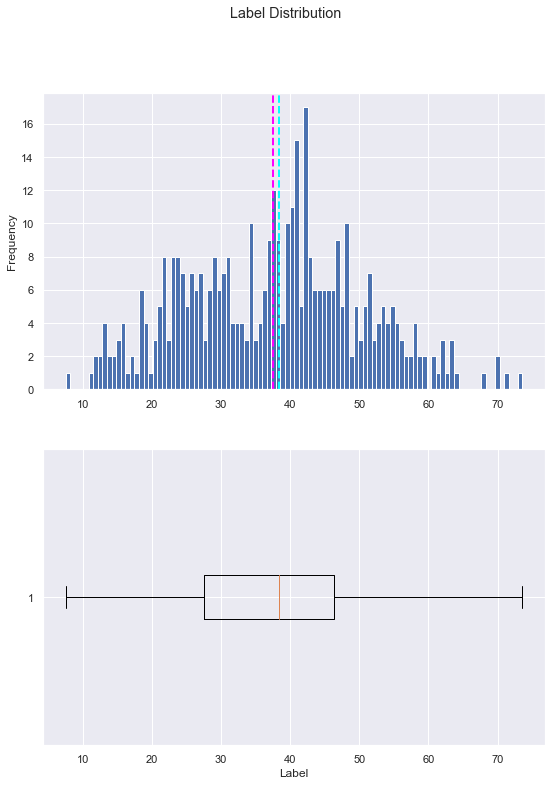

In [53]:
data= data[data['price_per_unit'].isin(outlier_function_pd(data['price_per_unit']))==False]

# Get the label column
label = data[data.columns[-1]]

# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize = (9,12))

# Plot the histogram   
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

# Add lines for the mean, median, and mode
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# Plot the boxplot   
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Label')

# Add a title to the Figure
fig.suptitle('Label Distribution')

# Show the figure
fig.show()

View numeric correlations

In [63]:
data.describe()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
count,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000
mean,2013.147019,17.638929,1089.953902,4.077859,24.968993,121.533328,37.591241
std,0.281884,11.354608,1264.697946,2.932371,0.012446,0.015391,12.768915
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,8.950000,289.324800,1.000000,24.962990,121.527600,27.500000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.400000
75%,2013.417000,27.800000,1455.798000,6.000000,24.977705,121.543395,46.300000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,73.600000


In [65]:
data.nunique()

transaction_date             12
house_age                   233
transit_distance            256
local_convenience_stores     11
latitude                    231
longitude                   231
price_per_unit              267
dtype: int64

As seen from above, transaaction_date and local_convenience_stores looks like categorical variables as they have fewer values

In [68]:
print(f'transaction_date {data.transaction_date.unique()}')
print(f'local_convenience_stores {data.local_convenience_stores.unique()}')


transaction_date [2012.917 2013.583 2013.5   2012.833 2012.667 2013.417 2013.083 2013.333
 2013.25  2012.75  2013.    2013.167]
local_convenience_stores [10  9  5  3  7  6  1  4  2  8  0]


In [82]:
data[data.columns.difference(['transaction_date','local_convenience_stores'])]

,house_age,latitude,longitude,price_per_unit,transit_distance
0,32.0,24.98298,121.54024,37.9,84.87882
1,19.5,24.98034,121.53951,42.2,306.59470
2,13.3,24.98746,121.54391,47.3,561.98450
3,13.3,24.98746,121.54391,54.8,561.98450
4,5.0,24.97937,121.54245,43.1,390.56840
...,...,...,...,...,...
409,13.7,24.94155,121.50381,15.4,4082.01500
410,5.6,24.97433,121.54310,50.0,90.45606
411,18.8,24.97923,121.53986,40.6,390.96960
412,8.1,24.96674,121.54067,52.5,104.81010


In [83]:
correlation_data=data[data.columns.difference(['transaction_date','local_convenience_stores'])].corr()
correlation_data

,house_age,latitude,longitude,price_per_unit,transit_distance
house_age,1.000000,0.052285,-0.053527,-0.242852,0.030167
latitude,0.052285,1.000000,0.412657,0.571849,-0.590426
longitude,-0.053527,0.412657,1.000000,0.554585,-0.806768
price_per_unit,-0.242852,0.571849,0.554585,1.000000,-0.701349
transit_distance,0.030167,-0.590426,-0.806768,-0.701349,1.000000


As seen price_per_unit is positively correlated with latitude and longitude and high negative correlation with transit_distance

* Thus, the higher the transit_distance reduces the price_per_unit

<AxesSubplot:>

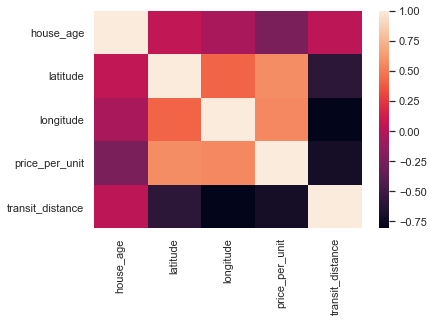

In [84]:
sns.heatmap(correlation_data)

In [55]:
data[data.columns[0:-1]]

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012.833,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381
410,2012.667,5.6,90.45606,9,24.97433,121.54310
411,2013.250,18.8,390.96960,7,24.97923,121.53986
412,2013.000,8.1,104.81010,5,24.96674,121.54067


Checking correlation between label taht is price_per_unit and independent variables

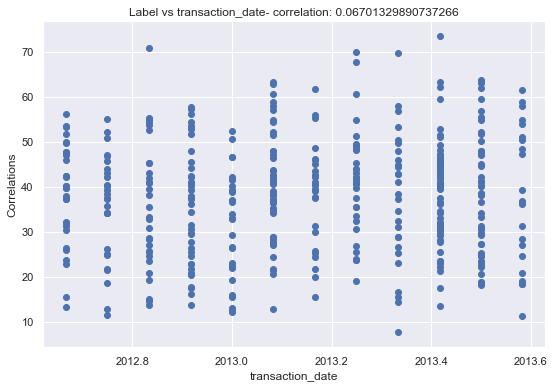

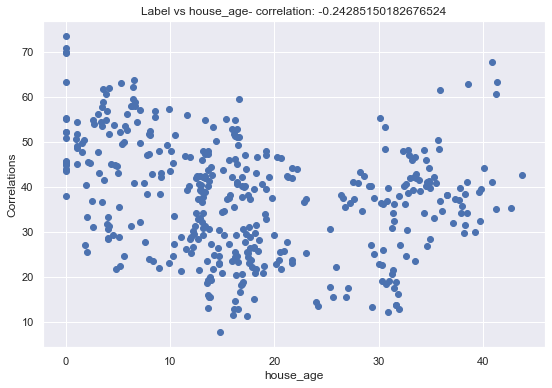

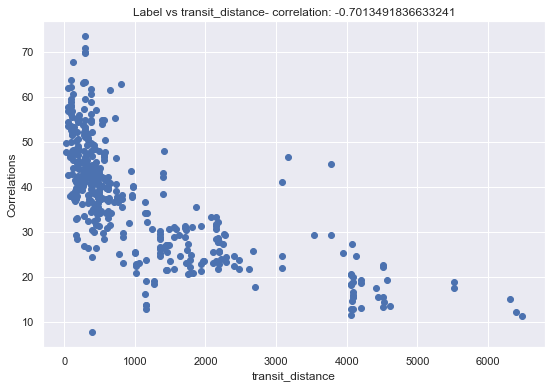

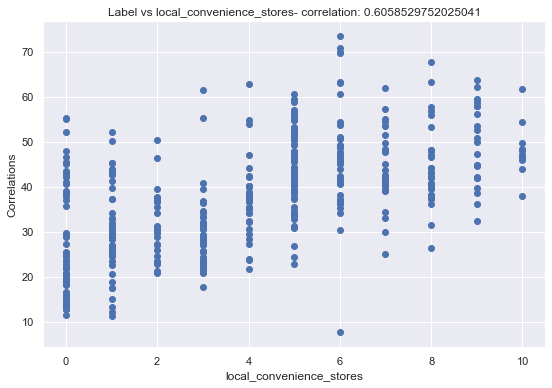

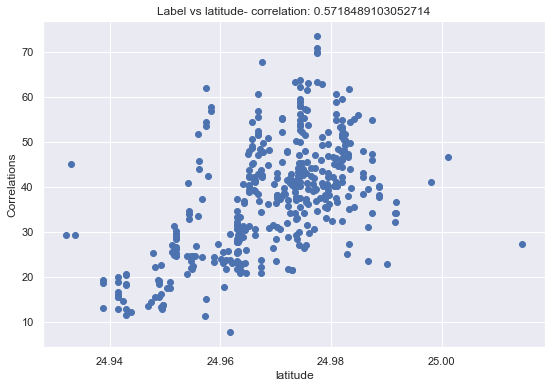

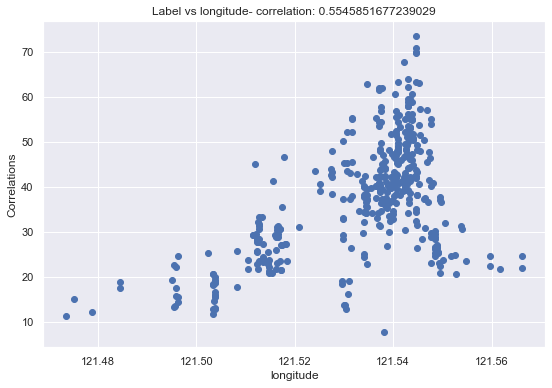

In [85]:
for col in data[data.columns[0:-1]]:
    fig = plt.figure(figsize=(9,6))
    ax =fig.gca()
    feature =data[col]
    correlation =feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Correlations')
    ax.set_title('Label vs '+ col + '- correlation: '+ str(correlation))

plt.show()

### View categorical features

(**transaction_date** and **local_convenience_stores** seem to be discrete values, so might work better if treated as categorical features)

In [87]:
data[['transaction_date', 'local_convenience_stores']]

,transaction_date,local_convenience_stores
0,2012.917,10
1,2012.917,9
2,2013.583,5
3,2013.500,5
4,2012.833,5
...,...,...
409,2013.000,0
410,2012.667,9
411,2013.250,7
412,2013.000,5


In [86]:
for col in data[['transaction_date', 'local_convenience_stores']]:
    print(col)

transaction_date
local_convenience_stores


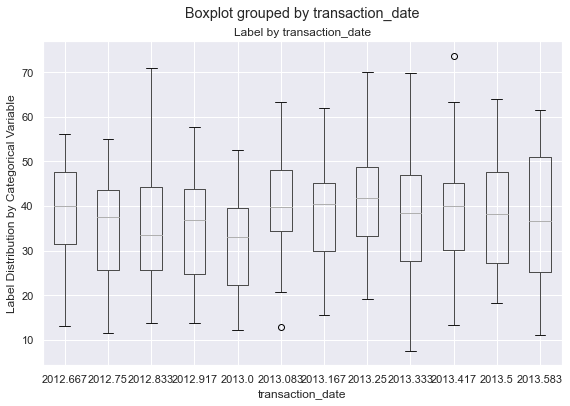

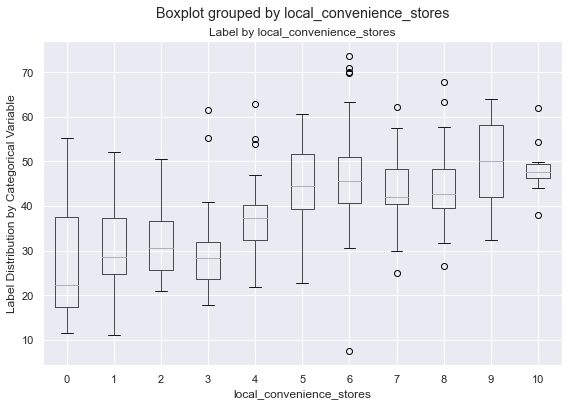

In [88]:
# plot a boxplot for the label by each categorical feature
for col in data[['transaction_date', 'local_convenience_stores']]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    data.boxplot(column = 'price_per_unit', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Label Distribution by Categorical Variable")
plt.show()